<center>
<img src="../../img/ods_stickers.jpg">


[Материал разработат на основе электронного ресурса](Ю.Кашницкого.https://mlcourse.ai/book/index.html)

# <center>Основные метрики качества классификации

[Статья](https://habrahabr.ru/company/ods/blog/328372/) на Хабре по этой теме. 

### Матрица ошибок
Существует множество различных числовых характеристик, позволяющих измерить качество бинарного классификатора. В случае двух классов возможны всего 4 исхода при классификации данного объекта. Их удобно отображать с помощью матрицы ошибок (confusion matrix).Это таблица с двумя строками и двумя столбцами, в ячейках которой указаны следующие значения:
- $TP$ = число верно классифицированных положительных примеров
- $FP$ = число отрицательных примеров, классифицированных положительно (ошибки первого рода)
- $TN$ = число верно классифицированных отрицательных примеров
- $FN$ = число положительных примеров, классифицированных отрицательно (ошибки второго рода)

<center>
<img src="../../img/contingency.png" width = "500">
</center>

Получить такую таблицу можно с помощью функции sklearn.metrics.confusion_matrix, передав ей на вход истинные и предсказанные классификатором метки.

In [1]:
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_diabetes

# First part - Confusion Matrix metrics
true_labels = np.array([0, 1, 0, 0, 1, 1, 1, 1])
predicted_labels = np.array([0, 1, 1, 0, 0, 1, 0, 0])

M = metrics.confusion_matrix(true_labels, predicted_labels)
PPV = metrics.precision_score(true_labels, predicted_labels)
TPR = metrics.recall_score(true_labels, predicted_labels)
F1 = metrics.f1_score(true_labels, predicted_labels)
ACC = metrics.accuracy_score(true_labels, predicted_labels)

### Характеристики бинарного классификатора
Основываясь на данной таблице, можно ввести несколько величин, характеризующих бинарный классификатор:
$$rec = TPR = \frac{TP}{TP + FN},\quad SPC = \frac{TN}{TN + FP},\quad prec = PPV = \frac{TP}{TP + FP},\quad FPR = 1 - SPC,$$

$$ACC = \frac{TP + TN}{TP + TN + FP + FN},\quad F1 = 2\frac{PPV\cdot TRP}{PPV + TPR}.$$

Полнота $TPR$ (True positive rate, recall, sensitivity) - доля верно классифицированных положительных примеров среди всех положительных примеров.

Специфичность $SPC$ (Specificity, true negative rate) - доля верно классифицированных отрицательных примеров среди всех отрицательных примеров.

Точность $PPV$ (Positive predictive value, precision) - доля верно классифицированных положительных примеров среди всех примеров, классифицированных положительно.

$FPR$ (False positive rate) - доля ошибочно классифицированных отрицательных примеров среди всех отрицательных примеров.

$ACC$ (Accuracy) - доля верно классифицированных примеров среди всех примеров. Основная характеристика качества классификации.

$F1$ (F1-measure) - среднее гармоническое точности и полноты. Позволяет учесть обе характеристики одновременно.





In [2]:
print("Confusion Matrix:")
print(M)
print(f"Precision (PPV): {PPV:.2f}")
print(f"Recall (TPR): {TPR:.2f}")
print(f"F1 Score: {F1:.2f}")
print(f"Accuracy: {ACC:.2f}")

Confusion Matrix:
[[2 1]
 [3 2]]
Precision (PPV): 0.67
Recall (TPR): 0.40
F1 Score: 0.50
Accuracy: 0.50


### ROC-кривая и AUC

Большинство бинарных классификаторов имеют вид $a(x) = \mbox{sign}(f(x, w) - w_0)$, где $w, w_0$ - параметры алгоритма. То есть сначала строится разделяющая поверхность $f(x, w) = w_0$, после чего объекты, находяющиеся по одну сторону от неё классифицируются положительно, по другую - отрицательно. 

ROC-кривая (Receiver Operating Characteristic) - это графическая характеристика качества бинарного классификатора, выражающая зависимость TPR от FPR при варьировании порога решающего правила. Она наглядно представляет, каким будет качество классификации при различных значениях $w_0$ и фиксированном значении $w$. 

ROC-кривая проходит через точки (0, 0) и (1, 1) и монотонно не убывает. Чем ближе кривая внутри квадрата $[0, 1]\times[0, 1]$ к левому верхнему углу, тем лучше. Идеальный вариант - кривая, проходящая через три точки: (0, 0), (1, 1) и (0, 1). Диагональ данного квадрата соответствует случайному гаданию. Типичная ROC-кривая для классификатора соответствует кривой B на рисунке.
<center>
<img src="../../img/ROC.jpg" width = "350">
</center>
На практике ROC-кривую всегда оценивают по независимой тестовой выборке, для того чтобы избежать переобучения.

Площадь под ROC-кривой AUC (Area Under Curve) является количественной характеристикой качества классификации, не зависящей от соотношения цен ошибок. Чем больше значение AUC, тем «лучше» модель классификации. 

### Случай дисбаланса классов

Возможные [действия](http://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/):
- Собрать больше данных, особенно примеров редкого класса (не всегда возможно)
- Использовать методы, основанные на деревьях решений  - случайный лес, градиентный бустинг над деревьями. Деревья не так подвержены проблеме дисбаланса классов
- Использовать метрики типа F1, ROC AUC и [Cohen's kappa](https://en.wikipedia.org/wiki/Cohen%27s_kappa), а не accuracy
- Использовать метрику, в которой ошибка на объекте из редкого класса входит с большим весом, чем ошибка на объекте из частого класса
- Применять [oversampling](https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis) и [undersampling](https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis). В первом случае в выборку добавляются представители редкого класса (сэмплируются с замещением). Во втором - представители частого класса случайным образом удаляются из выборки
- Сгенерировать искусственных представителей редкого класса. [SMOTE](http://www.jair.org/papers/paper953.html) (Synthetic Minority Over-sampling Technique). [Реализация](https://github.com/fmfn/UnbalancedDataset) на Python
- Разбить один большой класс на несколько поменьше и применить стратегии One Vs. All или One Vs. One
- Применить алгоритмы поиска выбросов или OneClass алгоритмы (например, OneClass SVM)

## Примеры

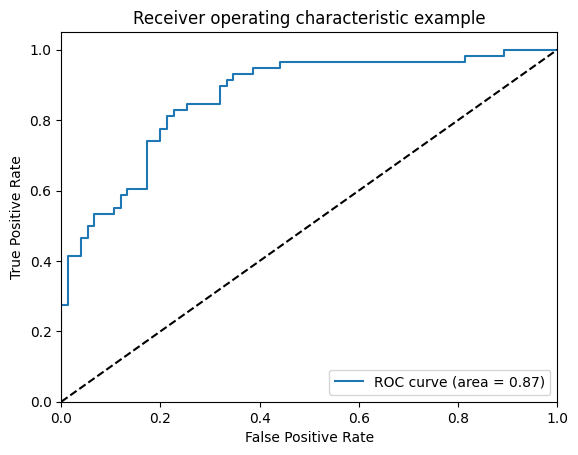

In [3]:
data = load_diabetes()
X = data.data
y = (data.target > data.target.mean()).astype(int)  # Convert to binary classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
C = 10.0  # Regularization parameter of the error term

lin_svm = LinearSVC(C=C, dual=False, max_iter=10000).fit(X_train, y_train)
y_score = lin_svm.decision_function(X_test)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

Указанные выше характеристики можно использовать для подбора параметров алгоритмов, например, с помощью кросс-валидации. Найдём оптимальное с точки зрения F1-меры число ближайших соседей в алгоритме kNN.

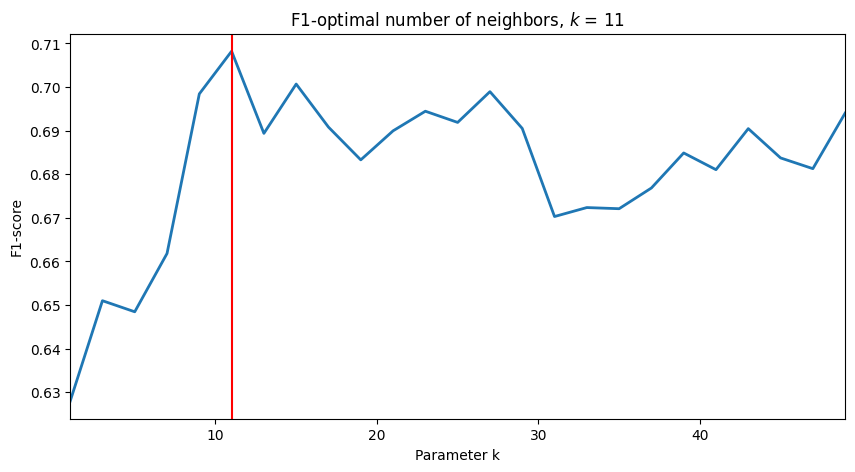


Optimal k = 11 with F1-score = 0.708


In [4]:
knn = KNeighborsClassifier()
k_s = np.arange(1, 50, 2)

scores_f1 = list()

for k in k_s:
    knn.n_neighbors = k
    scores_f1.append(np.mean(cross_val_score(knn, X, y, scoring="f1", cv=5)))

plt.figure(1, figsize=(10, 5))
plt.clf()
plt.plot(k_s, scores_f1, linewidth=2)
plt.axvline(k_s[np.argmax(scores_f1)], color="r")
plt.ylabel("F1-score")
plt.xlabel("Parameter k")
plt.xlim(1, 49)
plt.title("F1-optimal number of neighbors, $k$ = %d" % k_s[np.argmax(scores_f1)])
plt.show()

# Print the optimal k value
optimal_k = k_s[np.argmax(scores_f1)]
optimal_f1 = np.max(scores_f1)
print(f"\nOptimal k = {optimal_k} with F1-score = {optimal_f1:.3f}")

### Многоклассовая классификация
В случае, когда число классов больше двух, матрица ошибок определяется аналогичным образом: на пересечении $i$-ой строки и $j$-го столбца стоит число примеров $i$-го класса, отнесённых классификатором к классу $j$. 

In [5]:
import numpy as np
from sklearn import metrics, datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

# First part - Confusion Matrix for 3-class problem
true_labels = np.array([0, 1, 2, 0, 1, 2, 0, 1, 2])
predicted_labels = np.array([0, 2, 0, 2, 1, 0, 0, 1, 2])

M = metrics.confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix for 3-class problem:")
print(M)

# Calculate per-class metrics
print("\nClassification Report:")
print(metrics.classification_report(true_labels, predicted_labels))

Confusion Matrix for 3-class problem:
[[2 0 1]
 [0 2 1]
 [2 0 1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       1.00      0.67      0.80         3
           2       0.33      0.33      0.33         3

    accuracy                           0.56         9
   macro avg       0.61      0.56      0.57         9
weighted avg       0.61      0.56      0.57         9



### One vs. All
Многоклассовая классификация может быть сведена к бинарной различными способами. Одним из них является подход One vs. All. Его суть в следующем: для каждого класса $i \in \{1, \dots, k\}$ обучим бинарный классификатор $a_i(x) = \mbox{sign}f_i(x)$ на исходной выборке с изменёнными метками (объекты $i$-го класса получают метку 1, все оставшиеся объекты - метку 0), то есть мы учим $a_i$ отличать $i$-ый класс от всех остальных. После чего итоговый классификатор строится как $a(x) = \mbox{argmax}_{i \in \{1, \dots, k\}} f_i(x)$, то есть он выдаёт класс с наибольшей оценкой $f_i(x)$. 

In [6]:
# Second part - Iris dataset with OneVsRestClassifier
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Fitting One vs. All version of linear SVM
onevsall = OneVsRestClassifier(LinearSVC(max_iter=10000)).fit(X, y)
accuracy = metrics.accuracy_score(y, onevsall.predict(X))

print(f"\nAccuracy on Iris dataset: {accuracy:.3f}")

# Additional metrics for the Iris classifier
print("\nConfusion Matrix for Iris classifier:")
M_iris = metrics.confusion_matrix(y, onevsall.predict(X))
print(M_iris)

print("\nClassification Report for Iris classifier:")
print(metrics.classification_report(y, onevsall.predict(X), 
                                    target_names=iris.target_names))


Accuracy on Iris dataset: 0.967

Confusion Matrix for Iris classifier:
[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]

Classification Report for Iris classifier:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.96      0.94      0.95        50
   virginica       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



### Cсылки:

- [Статья](http://habrahabr.ru/post/228963/) "Как заставить работать бинарный классификатор чуточку лучше" на Habrahabr
- [ROC-кривая](http://www.machinelearning.ru/wiki/index.php?title=ROC-%D0%BA%D1%80%D0%B8%D0%B2%D0%B0%D1%8F)
- [Характеристики](https://en.wikipedia.org/wiki/Precision_and_recall) бинарного классификатора
- [One vs. All и One vs. One](https://en.wikipedia.org/wiki/Multiclass_classification)
- [Quora](https://www.quora.com/In-classification-how-do-you-handle-an-unbalanced-training-set) про несбаланированные выборки
- про несбаланированные выборки на [ресурсе](http://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/) Machine Learning Mastery